<a href="https://colab.research.google.com/github/DiantoroKadarman/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.
```
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')
```

 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


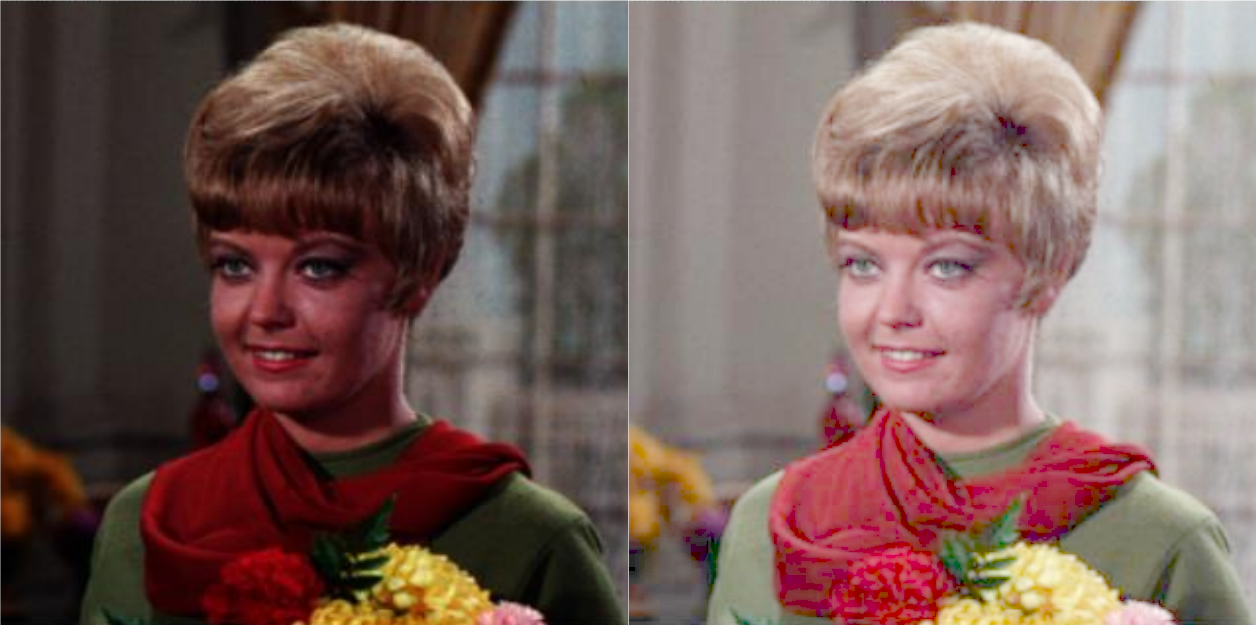

In [ ]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow

female1 = cv.imread('/content/drive/MyDrive/PCVK/gambar1.png')

imgTgs1 = female1.copy()

def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv.LUT(image, table)

print(' Gamma Correction pada citra ')
print('-----------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

adjusted = adjust_gamma(image=imgTgs1, gamma=gamma)
cv2_imshow(np.hstack([imgTgs1, adjusted]))

2. Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst. Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.
```
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
```

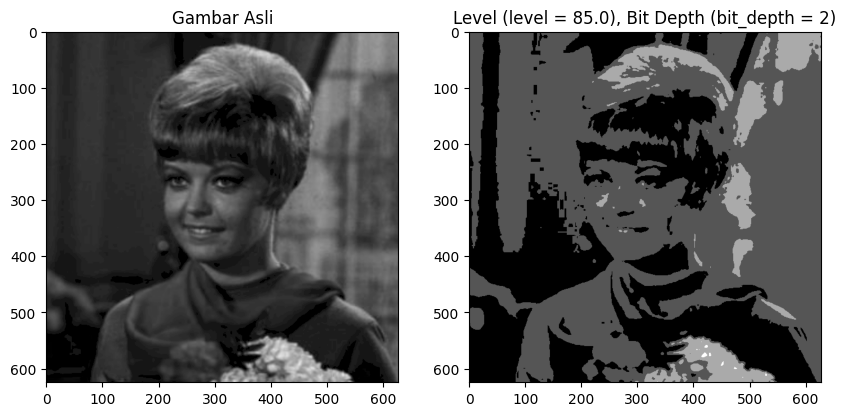

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/gambar1.png', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(depth_image, cv.COLOR_BGR2RGB))
plt.title(f'Level (level = {level}), Bit Depth (bit_depth = {bit_depth})')

plt.show()

3. Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).
```
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/noises/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)
```
Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst




In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)  # Menghitung Mean Squared Error (MSE)
    if mse == 0:  # Jika tidak ada noise, PSNR mencapai maksimum
        psnr = 100
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Memuat gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.png')

# Cek apakah gambar asli berhasil dimuat
if original is None:
    print("Error: Gambar asli tidak ditemukan atau path salah.")
else:
    # Daftar jumlah gambar dengan level noise berbeda yang akan di-average
    list_img = [5, 10, 20, 40, 80, 100]

    for img_count in list_img:
        # Membuat array kosong untuk menampung rata-rata gambar dengan noise
        average_noise = np.zeros_like(original, dtype=np.float32)

        # Memuat dan mengakumulasi gambar dengan noise
        for i in range(1, img_count + 1):
            noise = cv.imread(f'/content/drive/MyDrive/PCVK_IMAGE/images/Images/noises/{i}.jpg')

            # Cek apakah gambar dengan noise berhasil dimuat
            if noise is None:
                print(f"Error: Gambar noise {i}.jpg tidak ditemukan atau path salah.")
                continue

            # Mengakumulasi gambar dengan noise
            average_noise += noise.astype(np.float32)

        # Merata-ratakan gambar yang diakumulasi
        average_noise /= img_count

        # Mengubah gambar yang telah dirata-ratakan kembali ke format uint8
        average_noise = np.clip(average_noise, 0, 255).astype(np.uint8)

        # Menghitung PSNR antara gambar asli dan gambar noise yang dirata-ratakan
        psnr = PSNR(original, average_noise)

        # Menggabungkan gambar asli dan gambar noise yang dirata-ratakan secara horizontal
        final_frame = cv.hconcat([original, average_noise])

        # Menampilkan gambar
        plt.figure(figsize=(10, 5))
        plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB agar tampilan benar
        plt.title(f"Jumlah Citra di Average = {img_count}, Nilai PSNR (dB): {psnr:}")
        plt.show()

    # PSNR antara gambar asli dan gambar yang dirata-rata (harusnya PSNR tertinggi)
    psnr = PSNR(original, original)
    final_frame = cv.hconcat([original, original])

    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB untuk tampilan yang benar
    plt.title(f"Gambar asli dengan PSNR = {psnr:}")
    plt.show()